# <center> Ihor Kostiuk 255915 </center>
# <center> Assigment 6 </center>
### <center> https://github.com/Ihorkostiuk01/Diffusion_Processes </center>

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import numpy as np
from tqdm import tqdm 
plt.rcParams['figure.figsize'] = [15, 8]

In [5]:

def q_voter_simulation(MCS, N, p, q, network_type, **kwargs):
    """
    Simulates the q-voter model on a specified network type.

    Args:
        MCS (int): Number of Monte Carlo steps.
        N (int): Number of nodes in the network.
        p (float): Independence factor.
        q (int): Number of neighbors to interact with.
        network_type (str): Type of network. Valid options: 'complete', 'ba', 'ws'.
        **kwargs: Additional keyword arguments based on the network type:
            - For 'ba' network: M (int, optional): Number of edges to attach from a new node.
            - For 'ws' network: k (int, optional): Each node is connected to k nearest neighbors in a ring topology.
                                beta (float, optional): Probability of rewiring each edge.

    Returns:
        list: List containing the count of opinion 1 at each Monte Carlo step, excluding the initial count.
    """

    if network_type == 'complete':
        G = nx.complete_graph(N)
    elif network_type == 'ba':
        M = kwargs.get('M', 4)
        G = nx.barabasi_albert_graph(N, M)
    elif network_type == 'ws':
        k = kwargs.get('k', 4)
        beta = kwargs.get('beta', 0.2)
        G = nx.watts_strogatz_graph(N, k, beta)
    else:
        raise ValueError("Invalid network type.")

    opinions = [1] * N  # all initial opinions set to +1
    opinions_in_time = [opinions.count(1)]

    for _ in range(MCS):  # Monte Carlo steps
        opinion_1_count = 0
        for spinson in range(N):
            a = random.random()
            if a < p:  # independently
                b = random.random()
                if b >= 0.5:  # flip to opposite
                    opinions[spinson] = -opinions[spinson]
            else:  # conformity
                neighbors = list(G.neighbors(spinson))
                if len(neighbors) > 0:
                    kk = len(neighbors)
                    qq = min(kk, q)
                    q_panel = random.choices(neighbors, k=qq)  # without repetition
                    opinions_panel = {opinions[k] for k in q_panel}
                    if len(opinions_panel) == 1:  # all neighbors have the same opinion
                        opinions[spinson] = opinions_panel.pop()

            if opinions[spinson] == 1:
                opinion_1_count += 1
        opinions_in_time.append(opinion_1_count)

    return opinions_in_time[:-1]



def plot_q_voter_simulation(N, MCS, num_of_traj, q_values, p_values, network_type, **kwargs):
    """
    Plots the average final magnetization as a function of the independence factor p for the q-voter simulation.

    Args:
        N (int): Number of nodes in the network.
        MCS (int): Number of Monte Carlo steps.
        num_of_traj (int): Number of trajectories.
        q_values (list): List of q values to simulate.
        p_values (array-like): Array-like object representing the range of independence factor p.
        network_type (str): Type of network. Valid options: 'complete', 'ba', 'ws'.
        **kwargs: Additional keyword arguments based on the network type:
            - For 'ba' network: M (int, optional): Number of edges to attach from a new node.
            - For 'ws' network: k (int, optional): Each node is connected to k nearest neighbors in a ring topology.
                                beta (float, optional): Probability of rewiring each edge.

    Returns:
        None
    """

    fig, axes = plt.subplots(1, len(q_values), figsize=(20, 10))

    for j in range(len(q_values)):
        q = q_values[j]
        final_magn_list = []

        for p in tqdm(p_values, desc=f"q={q}, N={N}"):  # Add tqdm to iterate over p_values with a progress bar
            magn_list = []

            for n in range(num_of_traj):
                q_vot = q_voter_simulation(MCS, N, p, q, network_type, **kwargs)
                final_mag = (q_vot[-1] - (N - q_vot[-1])) / N
                magn_list.append(final_mag)

            final_magn_list.append(np.mean(magn_list))

        axes[j].plot(p_values, final_magn_list, label=network_type.upper() + f"({N})")
        axes[j].set_title(f"q={q}, N={N}", fontsize=20)
        axes[j].set_xlabel("p", fontsize=16)
        axes[j].set_ylabel("final magnetization", fontsize=16)
        axes[j].set_ylim(-0.2, 1.05)
        axes[j].legend(fontsize=16)
        axes[j].axhline(y=0, color='red', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

q=4, N=100: 100%|██████████| 26/26 [09:38<00:00, 22.26s/it]


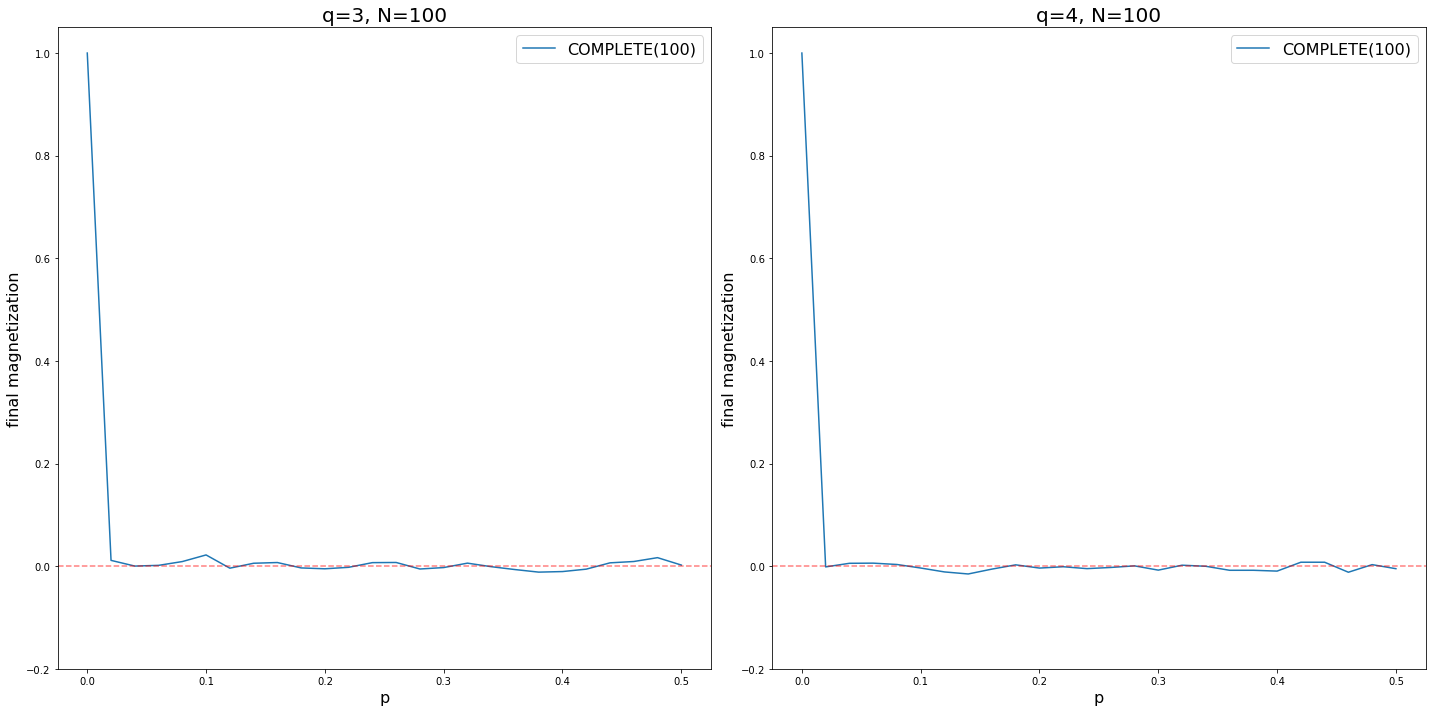

q=4, N=100: 100%|██████████| 26/26 [18:30<00:00, 42.71s/it]


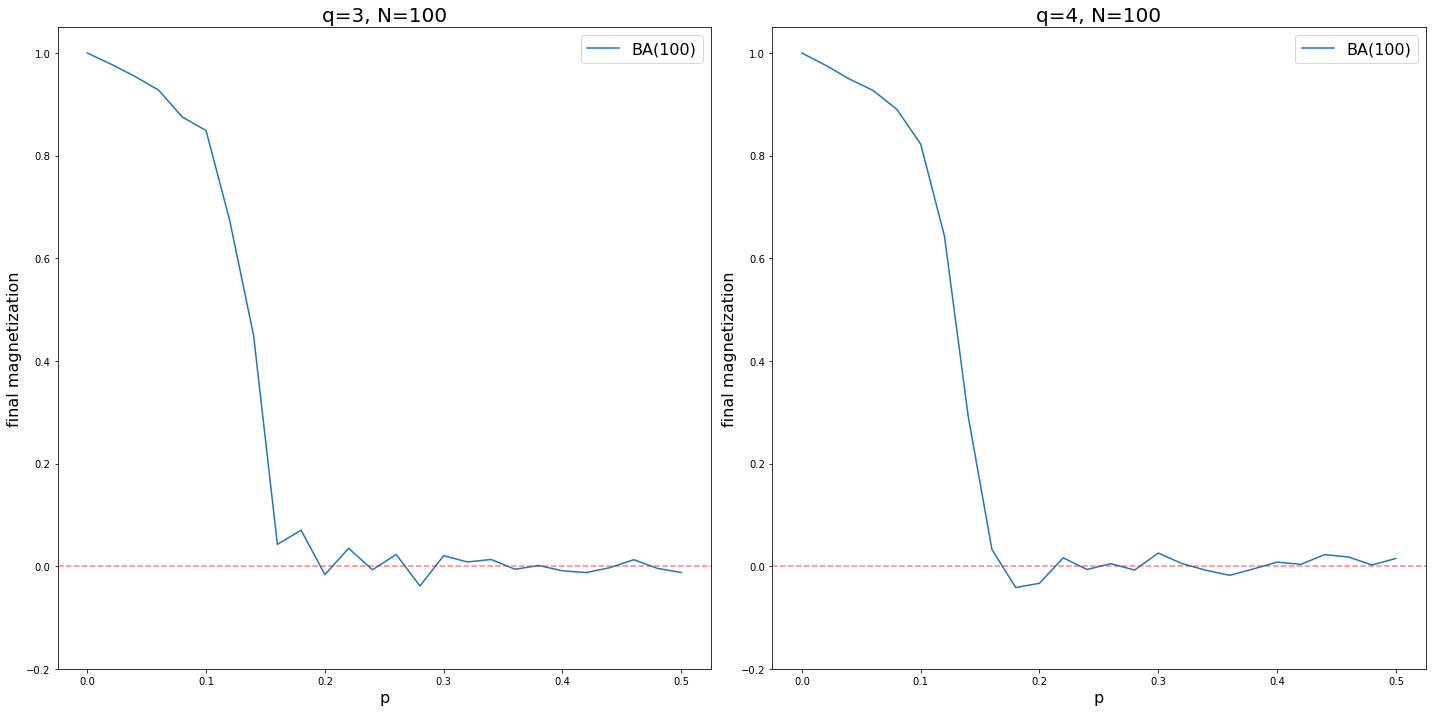

q=4, N=100: 100%|██████████| 26/26 [17:42<00:00, 40.88s/it]


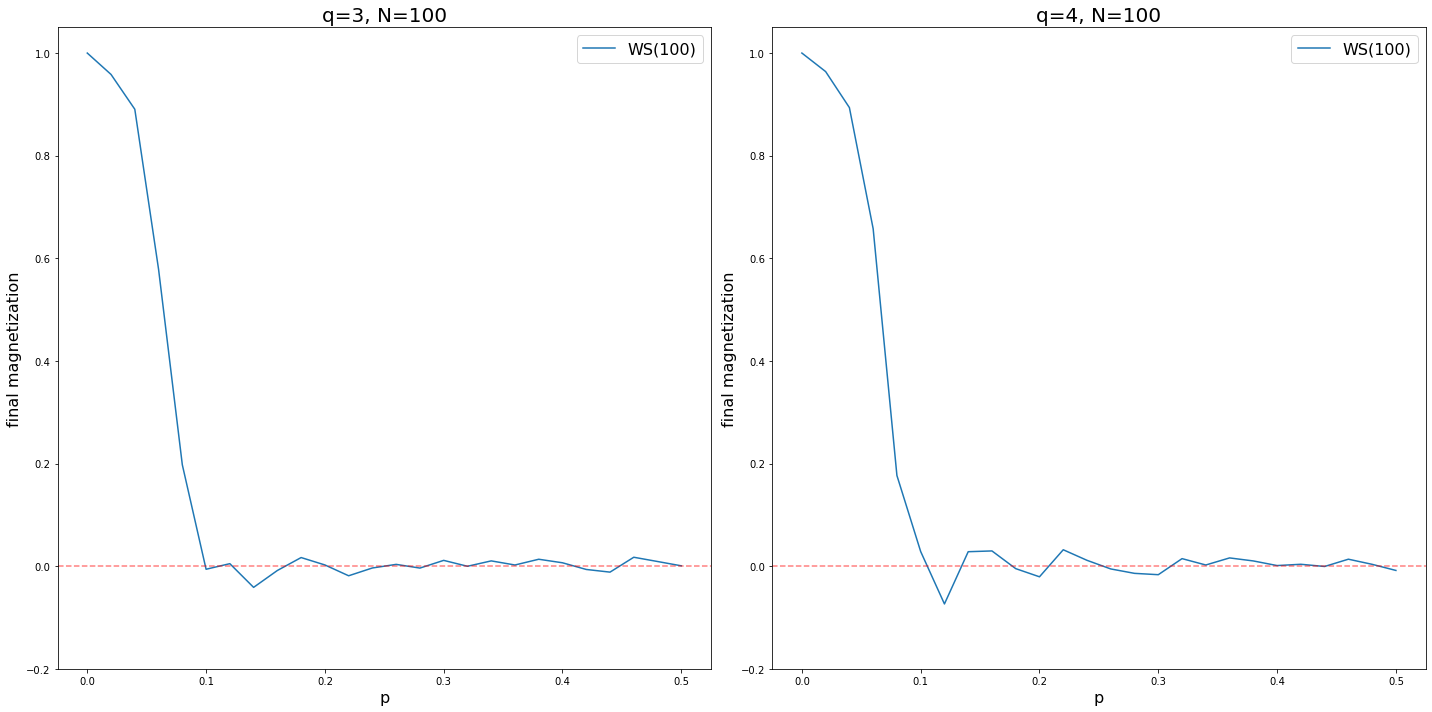

q=4, N=100: 100%|██████████| 26/26 [18:46<00:00, 43.33s/it]


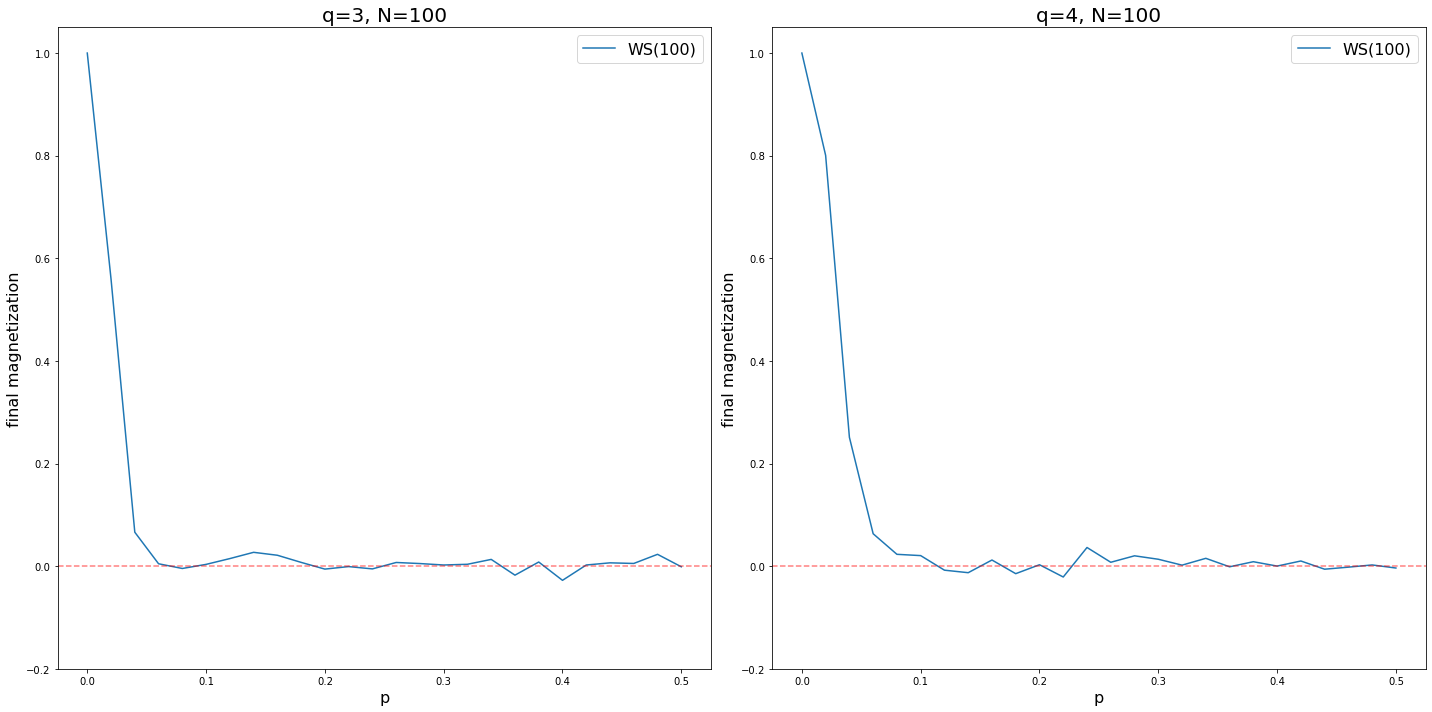

In [2]:
N = 100
MCS = 1000
num_of_traj = 200
q_values = [3, 4]
p_values = np.arange(0, 0.52, step=0.02)

# Plotting for different network topologies and q values
plot_q_voter_simulation(N, MCS, num_of_traj, q_values, p_values, network_type='complete')
plot_q_voter_simulation(N, MCS, num_of_traj, q_values, p_values, network_type='ba', M=4)
plot_q_voter_simulation(N, MCS, num_of_traj, q_values, p_values, network_type='ws', k=4, beta=0.2)

# Plotting for WS(100, 4, 0.01) network and different values of q
plot_q_voter_simulation(N, MCS, num_of_traj, q_values, p_values, network_type='ws', k=4, beta=0.01)

## Conclusions

The provided code simulates the q-voter model on different network topologies and examines the final magnetization as a function of the independence factor (`p`). The simulations reveal the impact of `p` and `q` on opinion formation dynamics within a network.

- Higher `p` values lead to stronger polarization, while larger `q` values promote opinion consensus.
- The complete network exhibits the highest final magnetization, followed by the Barabasi-Albert (BA) and Watts-Strogatz (WS) networks.
- Varying `q` affects the final magnetization, with higher `q` values amplifying conformity effects.
- Further investigations can explore additional network structures, parameter variations, and alternative metrics for a deeper understanding of the q-voter model.

These conclusions highlight the significance of network topology, independence factor, and neighbor interactions in shaping opinion dynamics within the q-voter model.

